<h1><b>Objective:</b></h1>

<h5>The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making/h5>2>

In [1]:
import mysql.connector  #To import mysql to connect
import pandas as pd     #To import pandas
import matplotlib.pyplot as plt  #To import matplotlib
import seaborn as sns   #To import seaborn 

In [2]:
# Replace the placeholders with your actual database credentials
connection = mysql.connector.connect(
user='root',
password='Anuska@123',
host='localhost',
database='ecommerce'
)

In [3]:
#To connect Cursor
cursor = connection.cursor()

In [4]:
# Load data into Pandas DataFrames
cursor.execute("select * from product")
prod_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from customer")
cust_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from customer c left join order_details o on c.customer_id = o.customer_id")
cust_ord_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.close()
connection.close()


In [5]:
prod_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [6]:
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [7]:
cust_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


<h2>DataCleaning:</h2>

In [8]:
#retrieve number of rows and colums
prod_df.shape

(61, 7)

In [9]:
#Give Information
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [10]:
prod_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [11]:
prod_df.describe(include=object).T

,count,unique,top,freq
product_id,61,61,P102,1
product_name,61,43,Tablet,4
category,61,4,Electronics,32
sub_category,61,22,Electronics,20


In [12]:
prod_df.isnull().value_counts()

product_id  product_name  category  sub_category  original_price  selling_price  stock
False       False         False     False         False           False          False    61
Name: count, dtype: int64

In [13]:
prod_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [14]:
cust_df.isnull().value_counts()

customer_id  name   city   email  phone_no  address  pin_code
False        False  False  False  False     False    False       62
Name: count, dtype: int64

In [15]:
cust_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [16]:
order_df.isnull().value_counts()

order_id  customer_id  product_id  quantity  total_price  payment_mode  order_date  order_status
False     False        False       False     False        False         False       False           76
Name: count, dtype: int64

In [17]:
order_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [18]:
# Check for duplicates
prod_df.duplicated().sum()

0

In [19]:
# Check for duplicates
cust_df.duplicated().sum()

0

In [20]:
# Check for duplicates
order_df.duplicated().sum()

0

In [21]:
prod_df['category'].unique()

array(['furniture', 'Electronics', 'Appliance', 'Furniture'], dtype=object)

In [22]:
prod_df['category'] = prod_df['category'].replace('furniture','Furniture')

In [23]:
prod_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

<h2>Exploratory Data Analysis (EDA) and Visualization:</h2>

<h4>Customer Analysis:</h4>

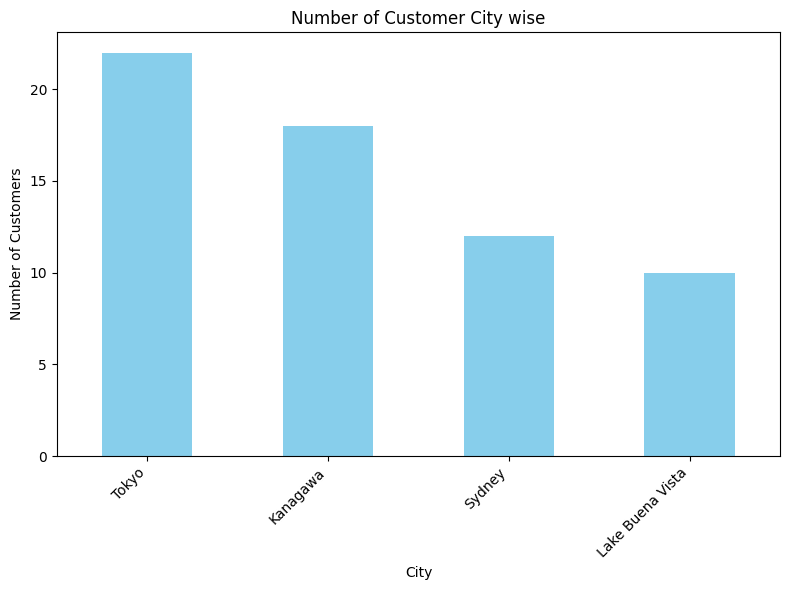

In [ ]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
citywise_customer_count.plot(kind='bar', color='skyblue')
plt.title('Number of Customer City wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()
plt.show()

<h4><b>Insights:</h4>

<h5>In the bar chart we can see the customer of tokyo is the highest and Lake Buena Vista is the lowest.</h5>

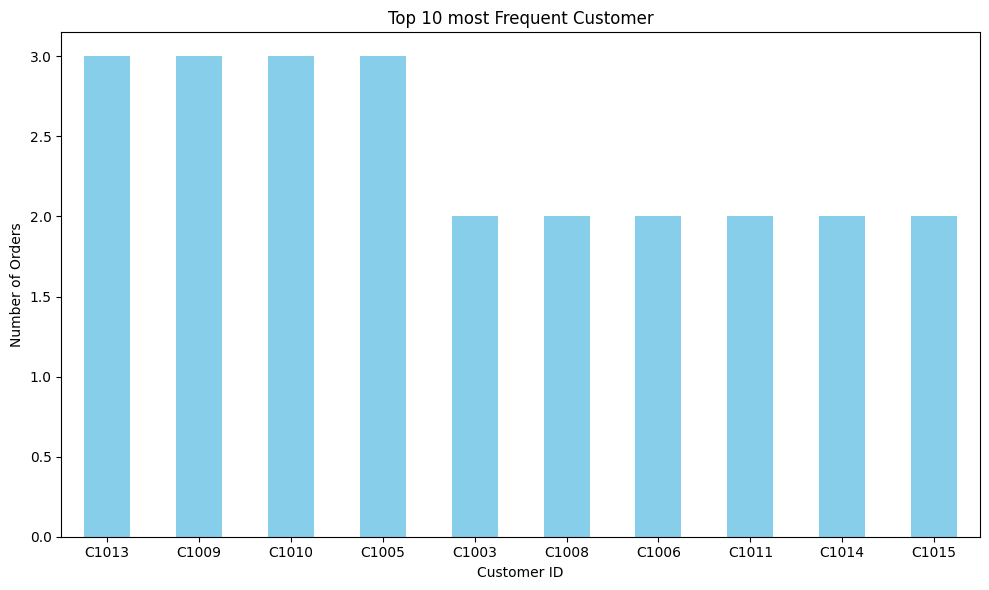

In [ ]:
# Merge customer and order data on the common column (e.g., customer_id)
merged_df = pd.merge(order_df, cust_df, how='inner', on='customer_id')

# Count the number of orders for each customer
customer_order_count = merged_df['customer_id'].value_counts()

# Identify the most frequent customers (top N customers)
top_customers = customer_order_count.head(10)  # You can adjust the number as needed

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 most Frequent Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Adjust rotation for better readability
plt.tight_layout()
plt.show()


<h4><b>Insights:</h4>
<h5>Here we can create a bar chart about Top 10 most Frequent Customer...C1013, C1009,C1010,C1005 is the Highest
    and C1003 - C1015 is the Lowest.</h5>lty.

<h4>Product Analysis:</h4>

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64


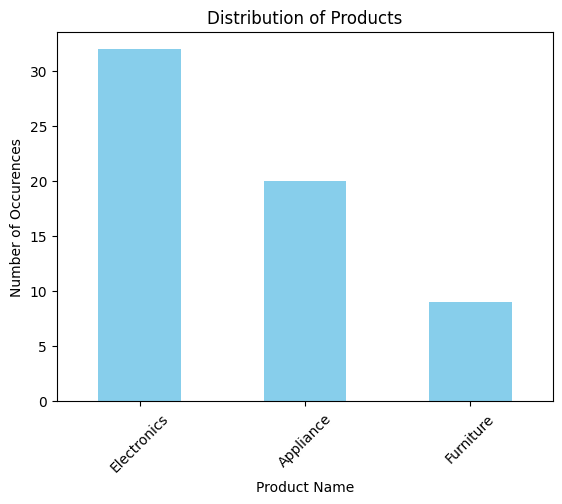

In [ ]:
category_counts = prod_df['category'].value_counts()
print(category_counts)
category_counts.plot(kind='bar', rot=45, color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Number of Occurences')
plt.title('Distribution of Products')
plt.show()


<h4><b>Insights:</h4>

<h5>Here we can create a bar chart about Distribution of products...So Electronics is the highest value which is 32, Appliance is the average which is  20 and Furniture is the lowest which is 9 .</54>

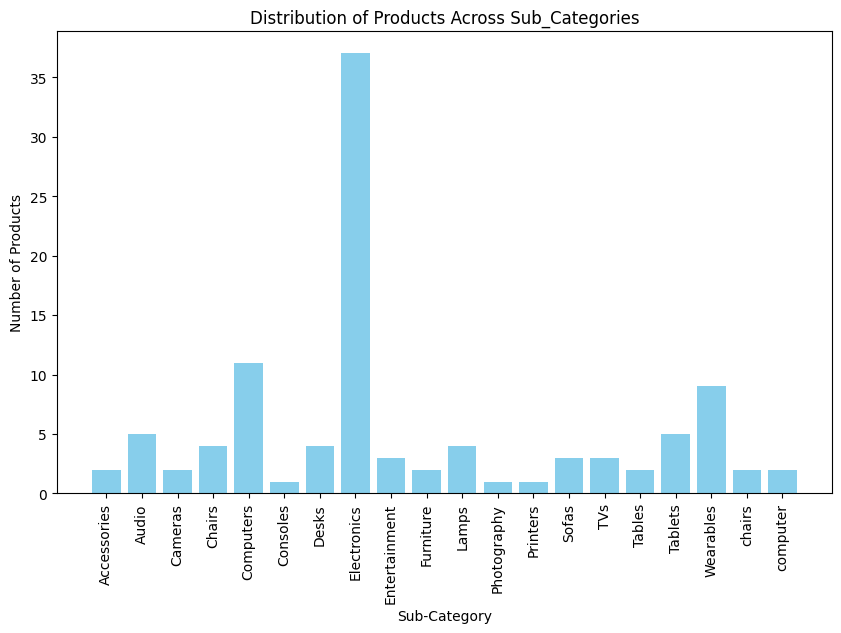

In [ ]:
# Merge the 'products' and 'orders' tables based on the common column ('product_id')
merged_data = pd.merge(prod_df, order_df, on='product_id', how='inner')

# Group by sub-category and sum the quantity for each sub-category
sub_category_distribution = merged_data.groupby('sub_category')['quantity'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sub_category_distribution['sub_category'], sub_category_distribution['quantity'], color='skyblue')
plt.title('Distribution of Products Across Sub_Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>1.Identify sub-categories with the highest bars: These sub-categories have the highest total quantity of products.</h5>

<h5>2.Observe the distribution of products: The chart provides a visual representation of how products are distributed across various sub-categories.</h5>

<h5>Rotated x-axis labels: The x-axis labels (sub-categories) are rotated for better readability, especially when dealing with potentially long sub-category names.</h5>

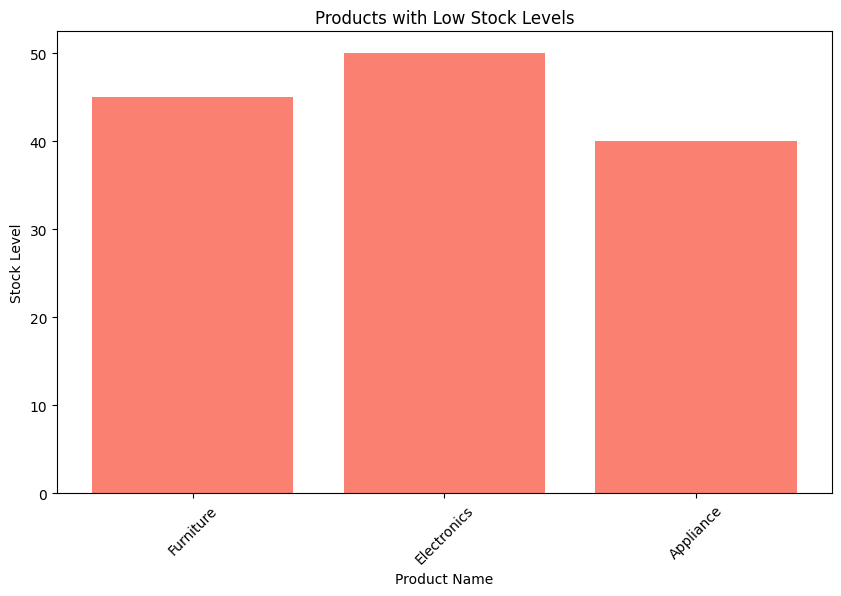

In [ ]:
low_stock_threshold = 100
low_stock_products = prod_df[prod_df['stock'] < low_stock_threshold]

plt.figure(figsize=(10, 6))
plt.bar(low_stock_products['category'], low_stock_products['stock'], color='salmon')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<h4><b>Insights:</h4>

<h5>Here we can create a bar chart about product with low stock lavel So Electronics is highest...Furniture is the average & Appliance is the lowest. .</h5>

Average Price 17774.62262295082
Maximum Price 70000.0
Minimum Price 450.0


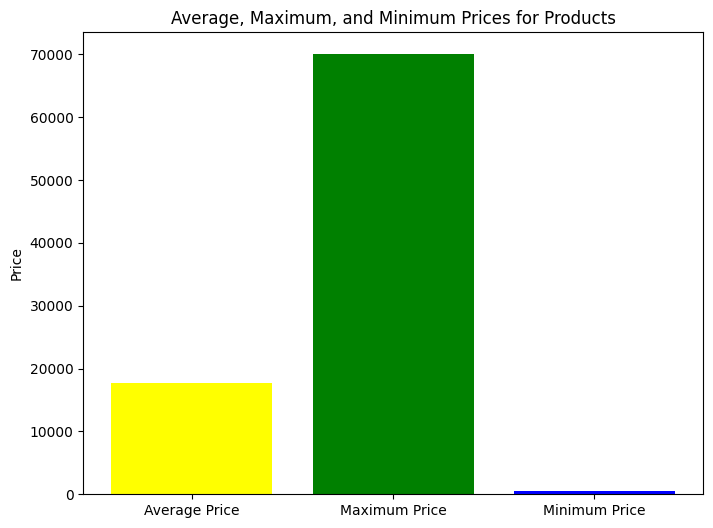

In [ ]:
average_price = prod_df['selling_price'].mean()
max_price = prod_df['selling_price'].max()
min_price = prod_df['selling_price'].min()

print("Average Price",average_price)
print("Maximum Price",max_price)
print("Minimum Price",min_price)

plt.figure(figsize=(8, 6))
plt.bar(['Average Price', 'Maximum Price', 'Minimum Price'], [average_price, max_price, min_price], color=['yellow', 'green', 'blue'])
plt.title('Average, Maximum, and Minimum Prices for Products')
plt.ylabel('Price')
plt.grid(False)
plt.show()



<h4><b>Insights:</h4>

<h5>Here we can create a bar chart about Average, Maximum & minimum price of products. Maximum price = 70000.0, Average =  17774.62262295082, Minimum = 450.0.</h5>

<h4>Order Analysis:</h4>

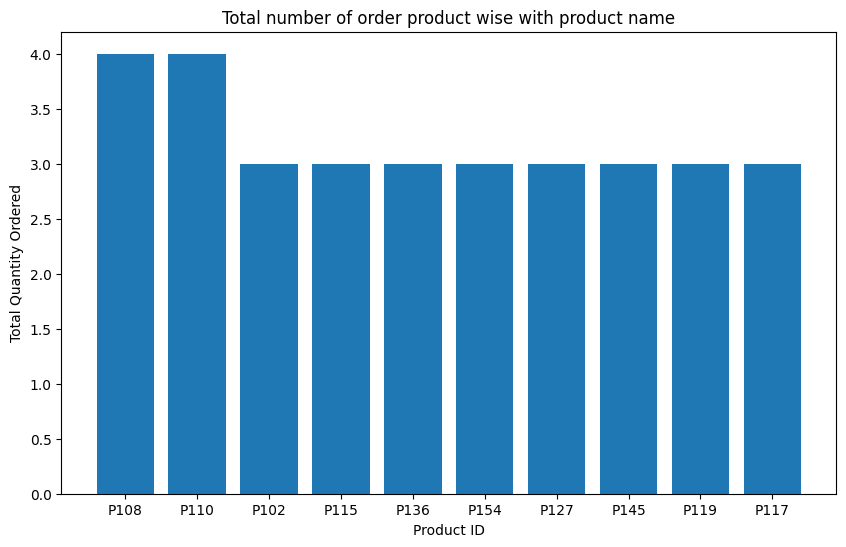

In [ ]:
product_orders = order_df.groupby('product_id')['quantity'].sum().reset_index()
top_10_products = product_orders.sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_id'], top_10_products['quantity'])
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.title('Total number of order product wise with product name')
plt.show()


<h4><b>Insights:</h4>

<h5>Here we can create a bar chart about Total number of order product wise with product name the highest is P108 & P110...Lowest is P102 - P117..</h5>

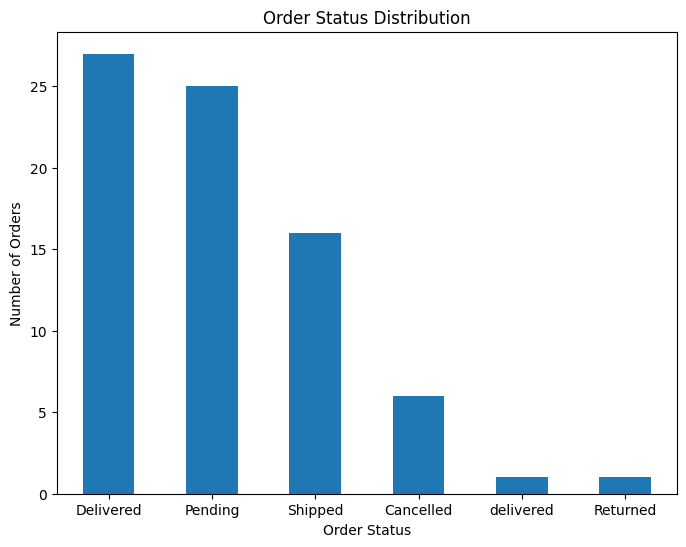

In [ ]:
order_status_counts = order_df['order_status'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Here we can create a bar chart about Order Status distribution So Delivered is the highest and returned is lowest..</h5>

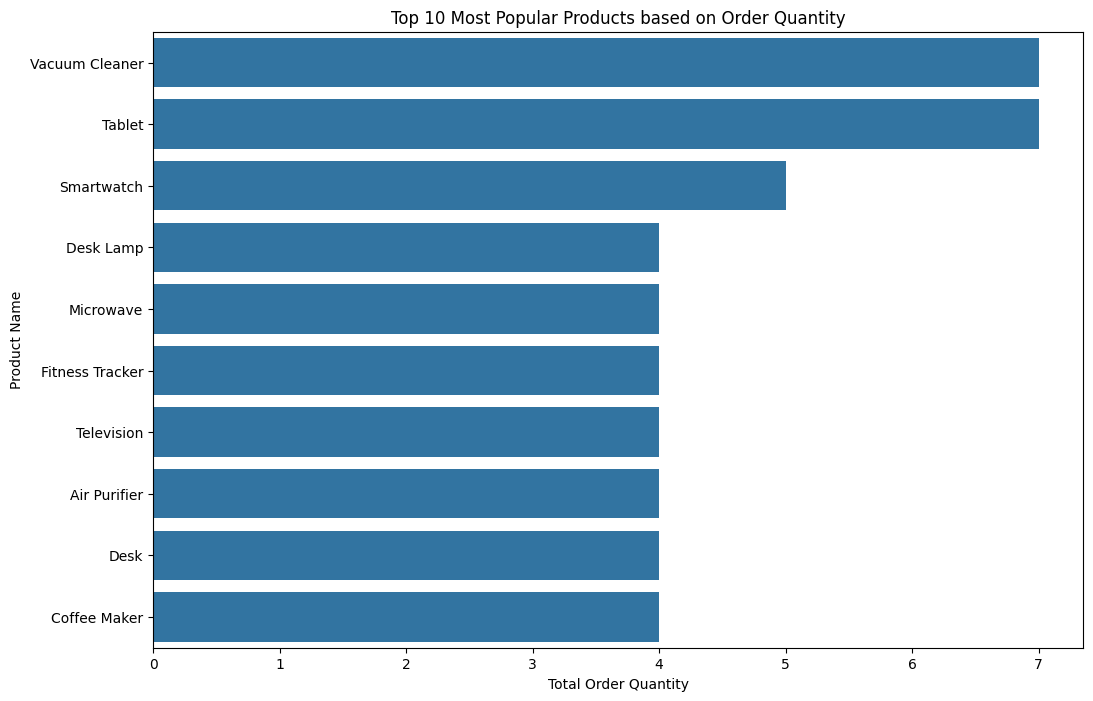

In [ ]:
# Merge data on 'product_id'
merged_data = pd.merge(order_df, prod_df, on='product_id')

# Calculate the total quantity sold for each product
top_products = merged_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.head(10).values, y=top_products.head(10).index )
plt.title('Top 10 Most Popular Products based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Here we can create a bar chart about Top 10 Most popular products based on Order Quantity...So Vacuum Cleaner and Tablet is highest and coffe maker is the lowest..</h5>

<h4>Sales Analysis:</h4>

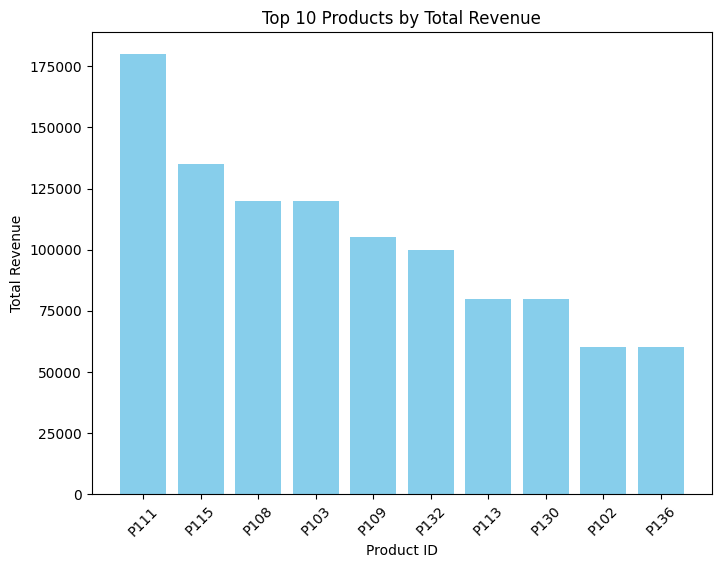

In [ ]:
# Merge the 'products' and 'orders' tables based on the common column ('product_id')
merged_data = pd.merge(order_df, prod_df, on='product_id', how='inner')

# Calculate the total revenue for each product
merged_data['total_revenue'] = merged_data['quantity'] * merged_data['original_price']

# Calculate the sum of revenue for each product
product_revenue_totals = merged_data.groupby('product_id')['total_revenue'].sum().reset_index()

# Sort the DataFrame by revenue in descending order
sorted_product_revenues = product_revenue_totals.sort_values(by='total_revenue', ascending=False)

# Take the top 10 rows for the bar chart
top_10_products_revenue = sorted_product_revenues.head(10)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(top_10_products_revenue['product_id'], top_10_products_revenue['total_revenue'], color='skyblue')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify the top 10 products with the highest total revenue based on the length of the bars.
The Highest number of product is P111 and Lowest is P102,P136e.</h5>

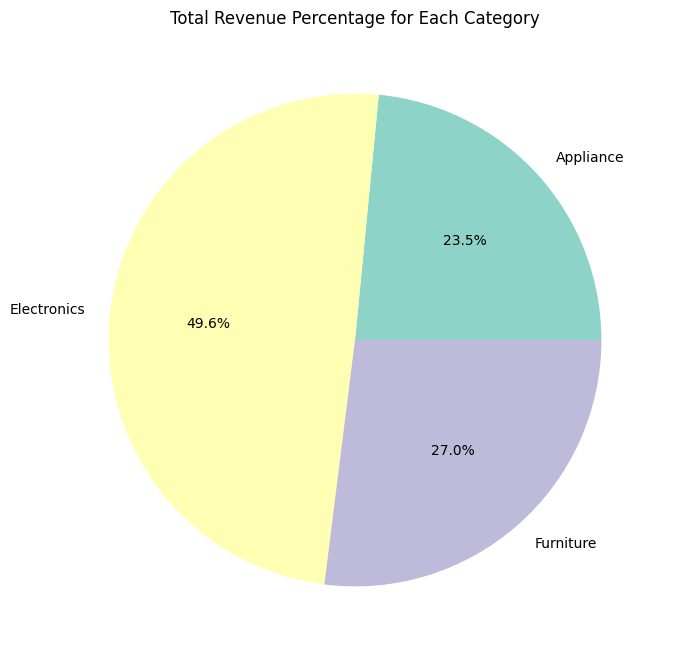

In [ ]:
# Merge data on 'product_id', 'order_id', and 'customer_id'
merged_data = pd.merge(order_df, prod_df[['product_id', 'category', 'original_price']], on='product_id')
#merged_data = pd.merge(merged_data, cust_df, on='customer_id')

# Calculate total revenue for each product category
merged_data['total_revenue'] = merged_data['quantity'] * merged_data['total_price']

# Group by category and calculate the sum of total revenue
category_revenue = merged_data.groupby('category')['total_revenue'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_revenue['total_revenue'], labels=category_revenue['category'], autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Total Revenue Percentage for Each Category')
plt.show()

<h4><b>Insights:</h4>

<h5>Identify the categories with larger slices, indicating higher contributions to total revenue.
Electronics is the highest, Average is Furniture and lowest is appliances.</h5>

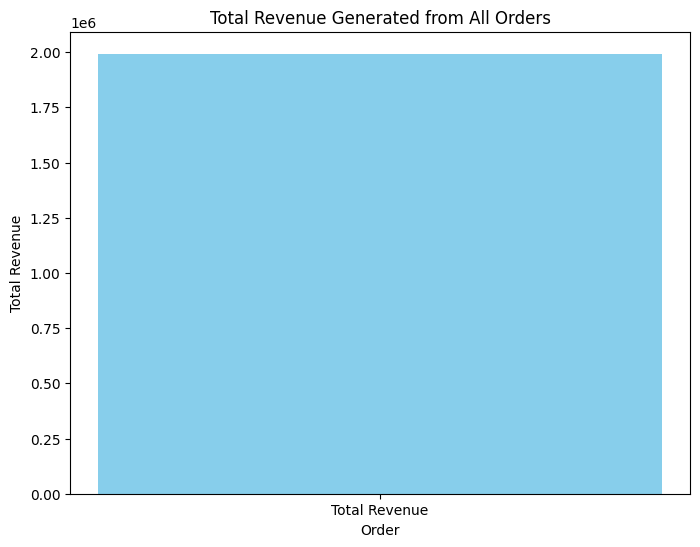

In [ ]:
# Merge data on 'product_id'
merged_data = pd.merge(order_df, prod_df[['product_id', 'original_price']], on='product_id')

# Calculate total revenue for each order
merged_data['total_revenue'] = merged_data['quantity'] * merged_data['original_price']

# Calculate the total revenue from all orders
total_revenue = merged_data['total_revenue'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.xlabel('Order')
plt.ylabel('Total Revenue')
plt.show()

<h4><b>Insights:</h4>

<h5>The length of the bar represents the total revenue generated from all orders.
It provides a quick overview of the overall financial performance in terms of total revenue.</h5>

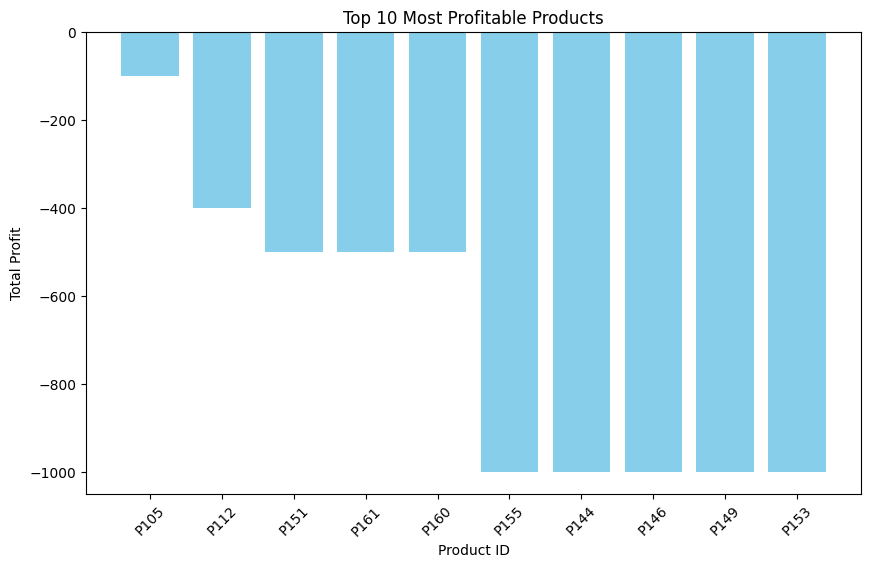

In [ ]:
# Merge the 'products' and 'orders' tables based on the common column ('product_id')
merged_data = pd.merge(order_df, prod_df, on='product_id', how='inner')

# Calculate the profit for each product
merged_data['profit'] = (merged_data['selling_price'] - merged_data['original_price']) * merged_data['quantity']

# Calculate the total profit for each product
product_profit_totals = merged_data.groupby('product_id')['profit'].sum().reset_index()

# Sort the DataFrame by profit in descending order
sorted_product_profits = product_profit_totals.sort_values(by='profit', ascending=False)

# Take the top 10 rows for the bar chart
top_10_products_profits = sorted_product_profits.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_products_profits['product_id'], top_10_products_profits['profit'], color='skyblue')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify the top 10 products with the highest total profits based on the length of the bars.
Visualize the contribution of each product to the overall profit.</h5>

<h4>Customer Order Patterns:</h4>

      product_name  quantity
35  Vacuum Cleaner       7.0
      product_name  quantity
36  Water Purifier       1.0


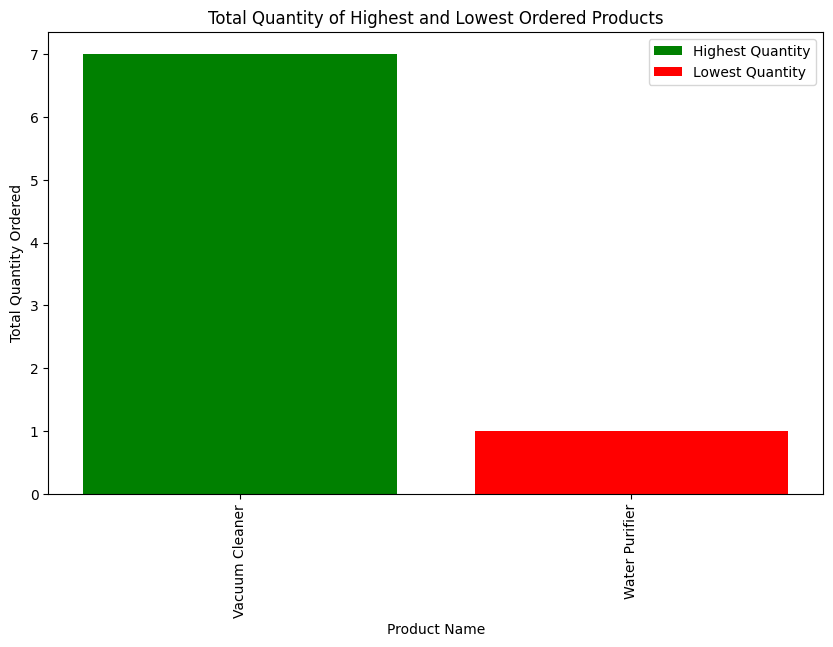

In [ ]:
# Merge orders and products data
merged_df = pd.merge(order_df, prod_df, how='inner', on='product_id')

# Group by product and calculate total quantities
product_quantities = merged_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify highest and lowest quantities
highest_quantity_product = product_quantities.sort_values(by='quantity', ascending=False).head(1)
lowest_quantity_product = product_quantities.sort_values(by='quantity').head(1)
print(highest_quantity_product)
print(lowest_quantity_product)

# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot highest quantity product in green
plt.bar(highest_quantity_product['product_name'], highest_quantity_product['quantity'], color='green', label='Highest Quantity')

# Plot lowest quantity product in red
plt.bar(lowest_quantity_product['product_name'], lowest_quantity_product['quantity'], color='red', label='Lowest Quantity')

plt.title('Total Quantity of Highest and Lowest Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.grid(False)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

<h4><b>Insights:</h4>

<h5>The chart allows us to visually compare the total quantities of the highest and lowest ordered products. Here the highest is Vacuum Cleanber and Lowest is Water Purifier.</h5>

name               Emma
customer_id       C1010
total_quantity      5.0
Name: 15, dtype: object
name              Aiden
customer_id       C1056
total_quantity      1.0
Name: 0, dtype: object


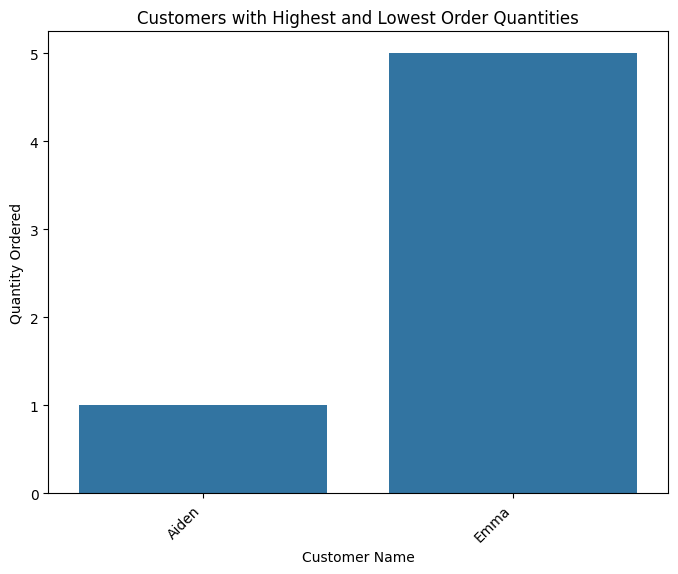

In [ ]:
# Merge data on 'customer_id'
merged_data = pd.merge(order_df[['customer_id','quantity']], cust_df, on='customer_id',how='inner')

# Calculate the total quantity ordered by each customer
customer_quantities = merged_data.groupby(['name','customer_id'])['quantity'].sum().reset_index(name='total_quantity')

# Identify the customer with the highest and lowest order quantities
#highest_quantity_customer = customer_quantities.nlargest(1, 'quantity')
#lowest_quantity_customer = customer_quantities.nsmallest(1, 'quantity')
highest_quantity = customer_quantities.loc[customer_quantities['total_quantity'].idxmax()]
lowest_quantity = customer_quantities.loc[customer_quantities['total_quantity'].idxmin()]
print(highest_quantity)
print(lowest_quantity)
filter_data = customer_quantities.loc[
(customer_quantities['customer_id']==highest_quantity['customer_id']) | (customer_quantities['customer_id'] == lowest_quantity['customer_id'])
]


# Create a bar chart
plt.figure(figsize=(8, 6))

# Plot highest quantity customer in green
sns.barplot(x='name',y='total_quantity',data=filter_data)
plt.title('Customers with Highest and Lowest Order Quantities')
plt.xlabel('Customer Name')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(False)
#plt.legend()
plt.show()

<h4><b>Insights:</h4>

<h5>The chart allows you to visually compare the order quantities for the customers with the highest and lowest quantities. The highest customer is Emma and lowest is Aiden.</h5>

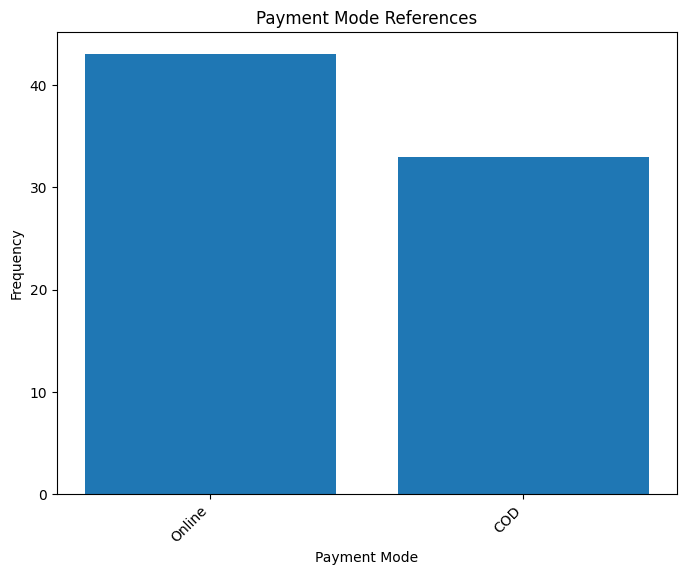

In [ ]:
# Check the unique values in the 'payment_mode' column
payment_mode_counts = order_df['payment_mode'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(payment_mode_counts.index, payment_mode_counts.values)
plt.title('Payment Mode References')
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify the most common payment modes by observing the lengths of the bars.
Understand the distribution and popularity of different payment modes within the dataset.
</h5>

<h4>Time-based Analysis:</h4>

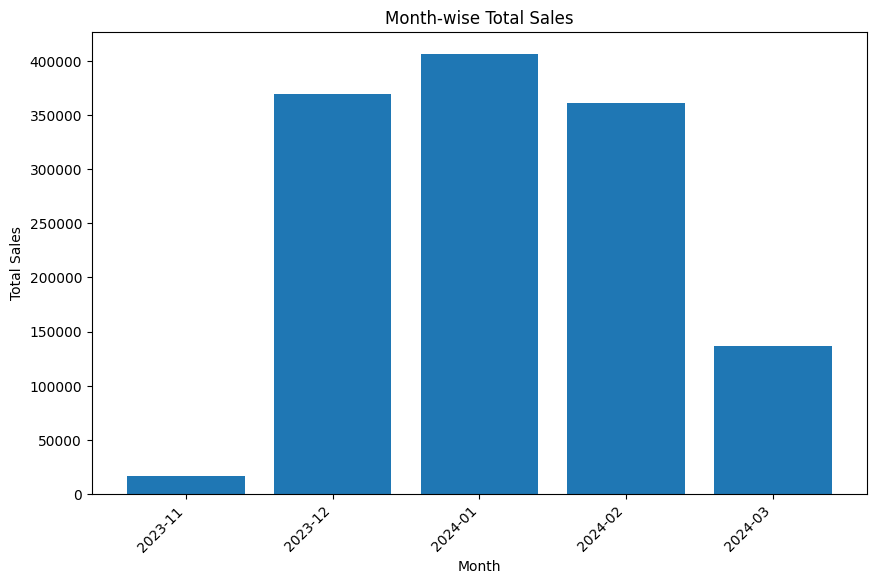

In [ ]:
# Merge data on 'product_id'
merged_data = pd.merge(order_df, prod_df, on='product_id')

# Convert 'order_date' to datetime
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

# Extract month and year from the 'order_date'
merged_data['month'] = merged_data['order_date'].dt.to_period('M')

# Calculate month-wise total sales
monthly_sales = merged_data.groupby('month')['selling_price'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(monthly_sales['month'].astype(str), monthly_sales['selling_price'])
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify patterns or trends in sales over different months.<br>
Observe months with higher or lower total sales So the highest is 2024-01 and lowest is 2023-11..</h5>

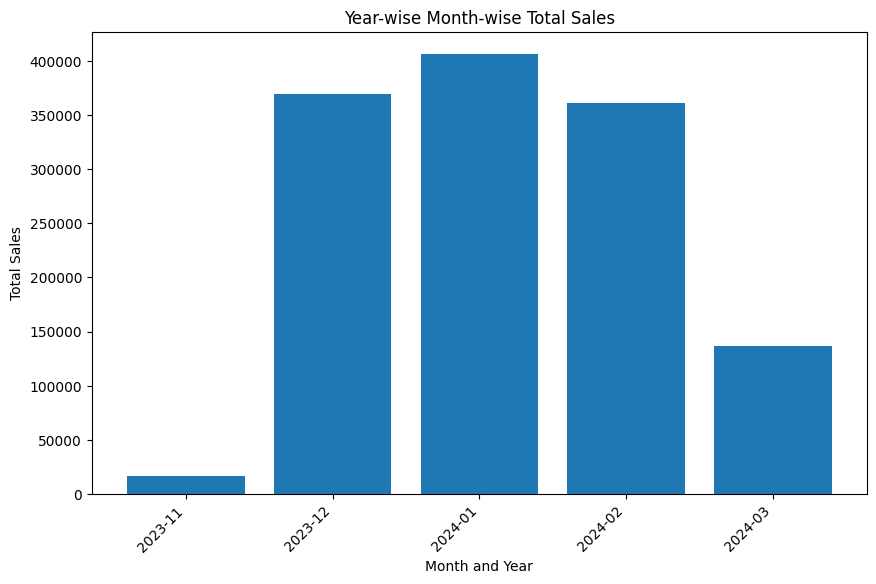

In [ ]:
# Merge data on 'product_id'
merged_data = pd.merge(order_df, prod_df, on='product_id')

# Convert 'order_date' to datetime
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

# Extract month and year from the 'order_date'
merged_data['month_year'] = merged_data['order_date'].dt.to_period('M')

# Calculate month and year-wise total sales
monthly_sales = merged_data.groupby('month_year')['selling_price'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['month_year'].astype(str), monthly_sales['selling_price'])
plt.title('Year-wise Month-wise Total Sales')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify patterns or trends in sales over different months and years.<br>
Observe months and years with higher or lower total sales.</h5>

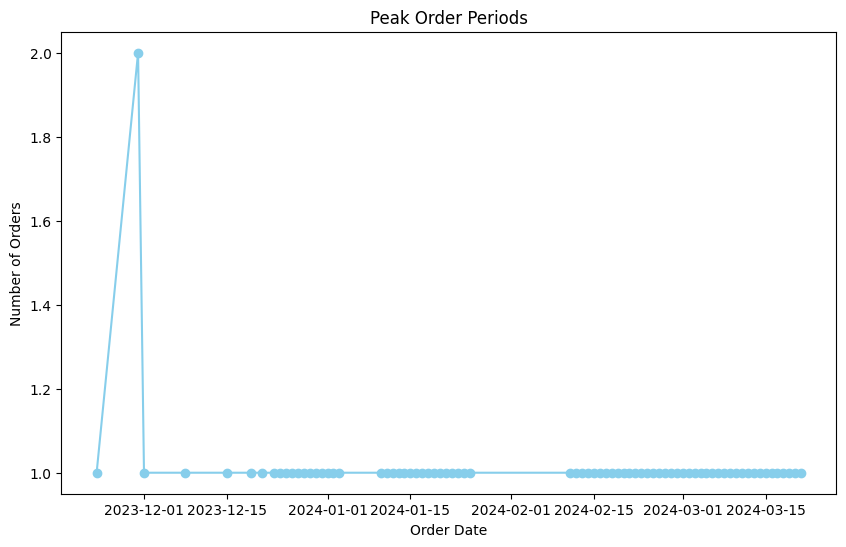

In [ ]:
# Convert 'order_date' column to datetime format
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Calculate the daily order count
daily_orders = order_df.groupby('order_date').size().reset_index(name='order_count')

# Sort the DataFrame by order date
daily_orders = daily_orders.sort_values(by='order_date')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_orders['order_date'], daily_orders['order_count'], color='skyblue', marker='o', linestyle='-')
plt.title('Peak Order Periods')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.show()


<h4><b>Insights:</h4>

<h5>Identify patterns, trends, or seasonality in the daily order counts.
Observe peak periods or periods of increased order activity.
</h5>

<h4>Geographical Analysis:</h4>

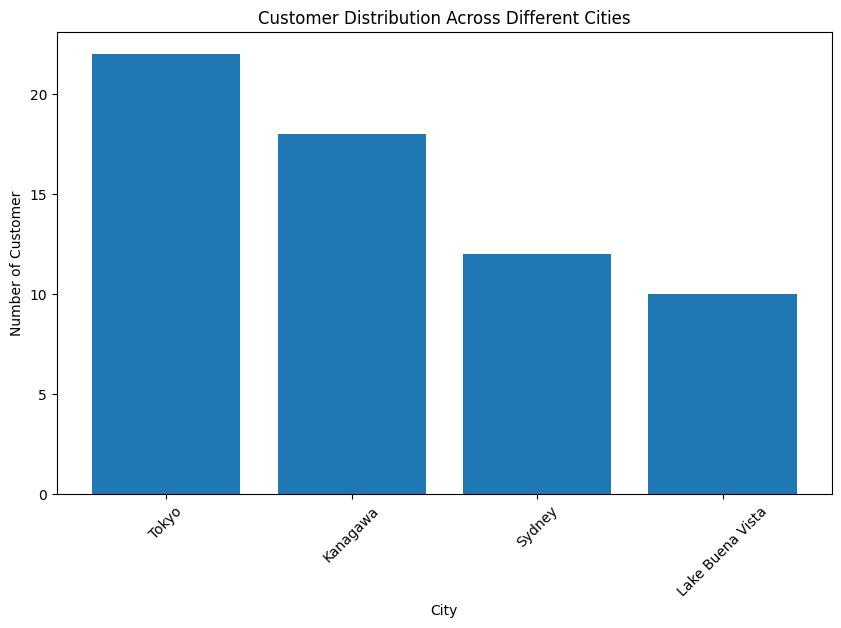

In [ ]:
# Calculate the count of customers in each city
customer_city_distribution = cust_df['city'].value_counts().reset_index()

# Rename columns for better readability
customer_city_distribution.columns = ['City', 'Customer Count']

# Sort the DataFrame by customer count in descending order
sorted_customer_city_distribution = customer_city_distribution.sort_values(by='Customer Count', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_customer_city_distribution['City'], sorted_customer_city_distribution['Customer Count'])
plt.title('Customer Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify cities with the highest and lowest customer counts.
Understand the overall distribution of customers across different citie .So here Tokyo is the highest and Lake Buena Vista is lowest.s.</h5>

<h4>Product Performance:
</h4>

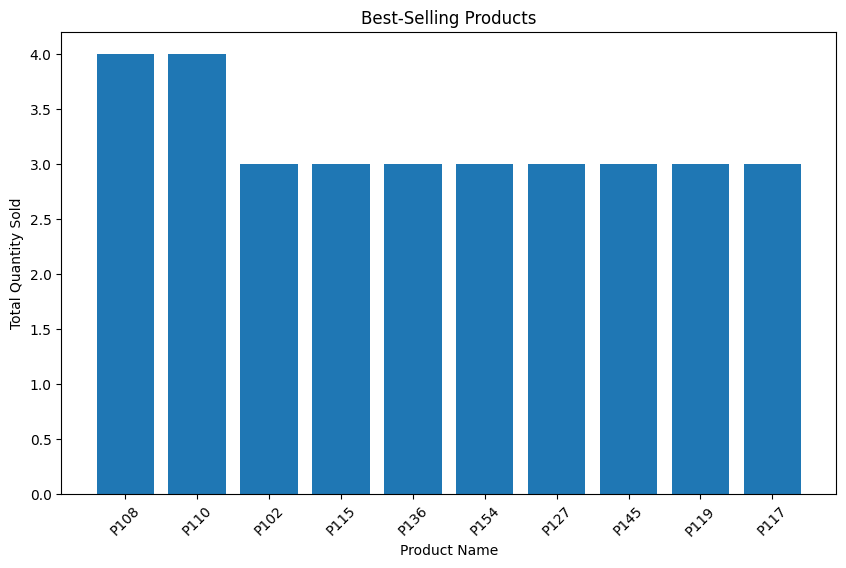

In [ ]:
# Calculate the total quantity ordered for each product
product_quantity_totals = order_df.groupby('product_id')['quantity'].sum().reset_index()

# Sort the DataFrame by quantity in descending order
sorted_product_quantities = product_quantity_totals.sort_values(by='quantity', ascending=False)

# Take the top 10 products for the bar chart
top_10_products = sorted_product_quantities.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_id'], top_10_products['quantity'])
plt.title('Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify the top-performing products based on total quantity sold.
Understand which products contribute significantly to overall sales.</h5>

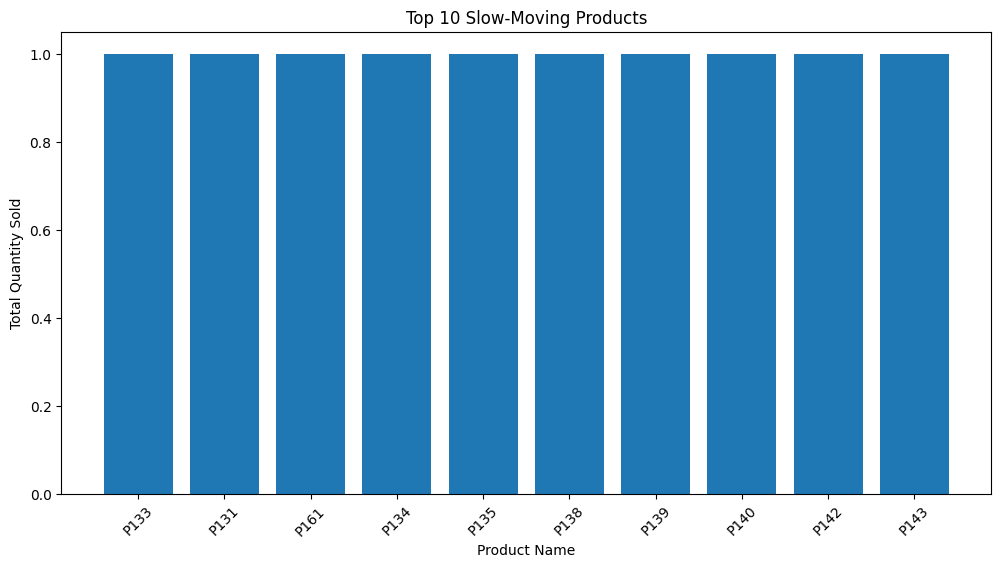

In [ ]:
# Calculate the total quantity ordered for each product
product_quantity_totals = order_df.groupby('product_id')['quantity'].sum().reset_index()

# Sort the DataFrame by quantity in ascending order (for slow-moving products)
sorted_product_quantities = product_quantity_totals.sort_values(by='quantity', ascending=True)

# Take the top 10 slow-moving products for the bar chart
top_10_slow_moving_products = sorted_product_quantities.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_slow_moving_products['product_id'], top_10_slow_moving_products['quantity'])
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify products with low sales volumes, which may be considered slow-moving.
Assess whether there are any patterns or factors contributing to slow sales for these products.</h5>

<h4> Payment Analysis:
</h4>

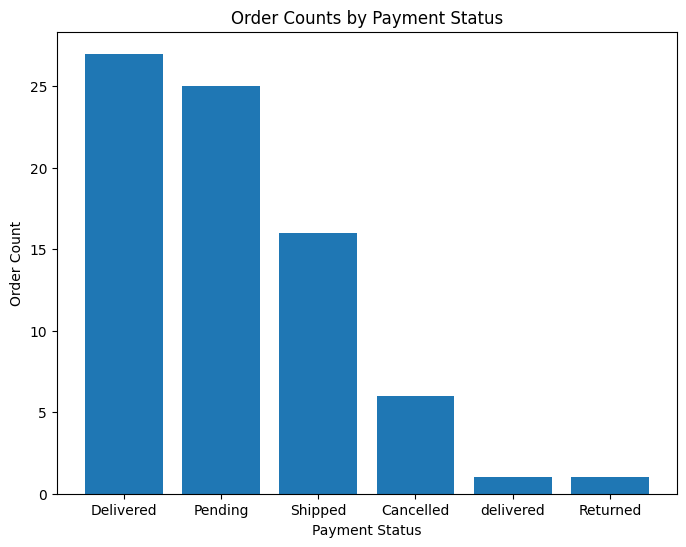

In [ ]:
# Calculate the order counts for successful and pending payments
payment_status_counts = order_df['order_status'].value_counts().reset_index()

# Rename columns for better readability
payment_status_counts.columns = ['order_status', 'Order Count']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(payment_status_counts['order_status'], payment_status_counts['Order Count'])
plt.title('Order Counts by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Order Count')
plt.grid(False)
plt.show()

<h4><b>Insights:</h4>

<h5>Identify the proportion of successful and pending orders in the dataset.
Assess the balance or potential issues related to order statuses.</h5>

<h2><b>Conclusion:</h2>

<h5><b>After cleaning and visualizing the data, we can draw conclusions such as:</h5>

<b> 1.Understanding customer behavior and preferences.
<b><br> 2.Identifying popular products or categories.
<b><br> 3.Recognizing peak times for orders.
<b><br> 4.Analyzing customer demographics and their impact on sales.